# Lesson 30 - Titanic Dataset

### The following topics are discussed in this notebook:
* A complete example of using classificaiton models. 

## Titanic Dataset

In this example, we will be working with the Titanic dataset. This dataset contains information about the 887 passengers on the voyage of the Titanic. Of the columns available, we will be particularly interested in the following:

* **`Survived`** - Binary variable indicating whether or not the passenger survived the voyage. 
* **`Pclass`** - Categorical variable indicating the passenger class. 
* **`Sex`** - Categorical variable indicating the gender of the passenger. 
* **`Age`** - Age of the passenger.

Our goal in this example will be to build a model for the purposes of predicting whether or not particular passengers survived the disaster based on their values for `Pclass`, `Sex`, and `Age`. 

## Import Packages and Tools

We will begin by importing the packages and tools that we will use in this example.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Load the Data

The data is stored in the tab-delimited file `titanic.txt`. We will load that now.

In [2]:
df = pd.read_csv('data/titanic.txt', sep='\t')
df.head(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


In [3]:
print(df.shape)

(887, 8)


## Visually Inspect Data

Before creating any models, we will use `matplotlib` to visually inspect the relationships between our features and our label. 

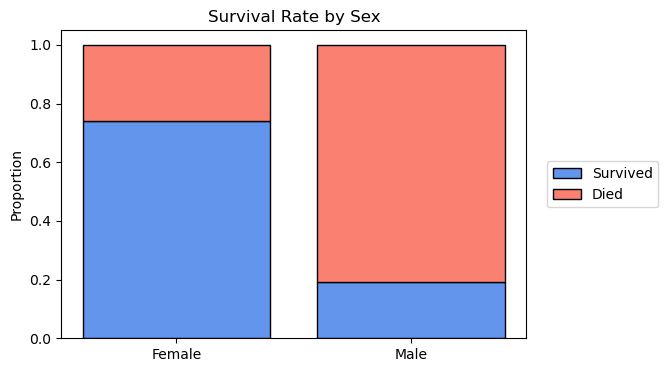

In [4]:
female_survival_rate = np.sum((df.Sex == 'female') & (df.Survived == 1)) / np.sum(df.Sex == 'female')
male_survival_rate = np.sum((df.Sex == 'male') & (df.Survived == 1)) / np.sum(df.Sex == 'male')
sex_survival_rates = np.array([female_survival_rate, male_survival_rate])
sex_death_rates = 1 - sex_survival_rates

plt.figure(figsize=[6,4])
plt.bar(['Female', 'Male'], sex_survival_rates, label='Survived', 
        color='cornflowerblue', edgecolor='k')
plt.bar(['Female', 'Male'], sex_death_rates, label='Died', 
        bottom=sex_survival_rates, color='Salmon', edgecolor='k')
plt.legend(loc="center left", bbox_to_anchor=(1.03,0.5))
plt.ylabel('Proportion')
plt.title('Survival Rate by Sex')
plt.show()

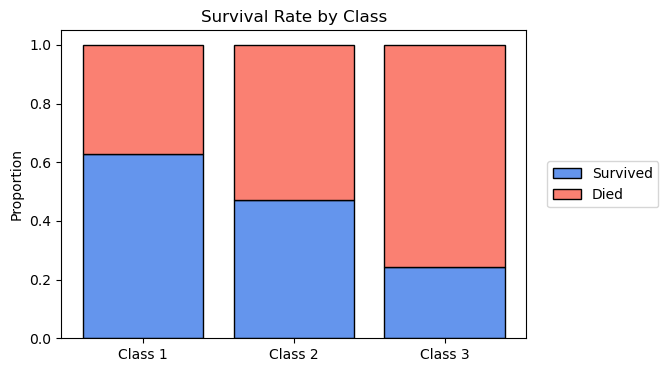

In [5]:
class1_survival_rate = np.sum((df.Pclass == 1) & (df.Survived == 1)) / np.sum(df.Pclass == 1)
class2_survival_rate = np.sum((df.Pclass == 2) & (df.Survived == 1)) / np.sum(df.Pclass == 2)
class3_survival_rate = np.sum((df.Pclass == 3) & (df.Survived == 1)) / np.sum(df.Pclass == 3)
class_survival_rates = np.array([class1_survival_rate, class2_survival_rate, class3_survival_rate])
class_death_rates = 1 - class_survival_rates

plt.figure(figsize=[6,4])
plt.bar(['Class 1', 'Class 2', 'Class 3'], class_survival_rates, label='Survived', 
        color='cornflowerblue', edgecolor='k')
plt.bar(['Class 1', 'Class 2', 'Class 3'], class_death_rates, label='Died', 
        bottom=class_survival_rates, color='Salmon', edgecolor='k')
plt.legend(loc="center left", bbox_to_anchor=(1.03,0.5))
plt.ylabel('Proportion')
plt.title('Survival Rate by Class')
plt.show()

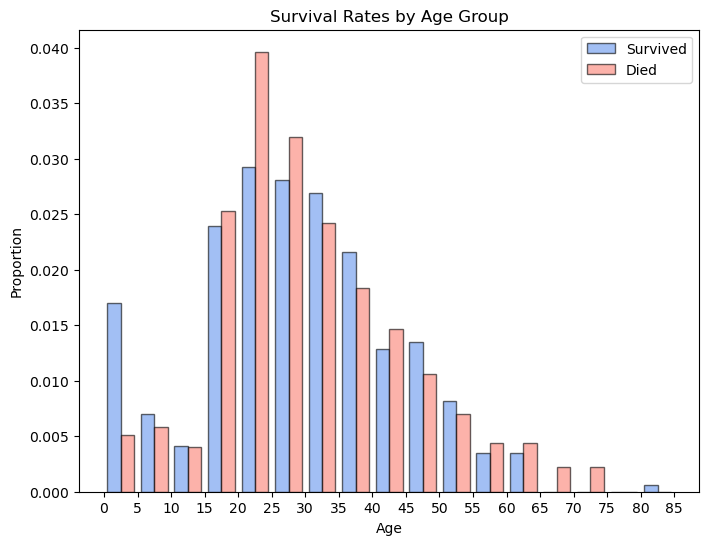

In [6]:
#prop_surv = 

plt.figure(figsize=[8,6])
plt.hist([df.Age.values[df.Survived == 1], df.Age.values[df.Survived == 0]], 
         bins=np.arange(0,90,5), label=['Survived','Died'], density=True,
         edgecolor='k', alpha=0.6, color=['cornflowerblue','salmon'])
plt.xticks(np.arange(0,90,5))
plt.legend()
plt.xlabel('Age')
plt.ylabel('Proportion')
plt.title('Survival Rates by Age Group')
plt.show()

## Separate Numerical and Categorical Columns

We will separate the numerical and categorical features into separate arrays so that we can apply one-hot encoding to the categorical features. We will also extract the label array. 

In [7]:
Xnum = df.iloc[:, [4]].values
Xcat = df.iloc[:, [1, 3]].values.astype('str')
y = df.iloc[:, 0].values

## Encode Categorical Features

We will now perform one-hot encoding on the categorical features. 

In [8]:
encoder = OneHotEncoder(sparse_output=False)
encoder.fit(Xcat)
Xenc   = encoder.transform(Xcat)

print(Xenc.shape)

(887, 5)


## Combine Feature Arrays

We will now recombine our numerical feature array with our one-hot encoded categorical feature array. 

In [11]:
X = np.hstack([Xnum, Xenc])

## Split the Data

We will split the data into training, validation, and test sets, using a 70/15/15 split.

In [12]:
X_train, X_hold, y_train, y_hold = train_test_split(X, y, test_size = 0.3, random_state=1, stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(X_hold, y_hold, test_size = 0.5, random_state=1, stratify=y_hold)

print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)


(620, 6)
(133, 6)
(134, 6)


## Create Logistic Regression Model

In the cell below, we create a logistic regression model, and then calculate its training and validation accuracy. 

In [14]:
logreg_model = LogisticRegression(solver='lbfgs', penalty=None)
logreg_model.fit(X_train, y_train)

print('Training Accuracy:  ', round(logreg_model.score(X_train, y_train),4))
print('Validation Accuracy:', round(logreg_model.score(X_valid, y_valid),4))

Training Accuracy:   0.8016
Validation Accuracy: 0.7519


## Create Decision Tree Model

We will now perform hyperparameter tuning to select the optimal value for the `max_depth` parameter for a decision tree. 

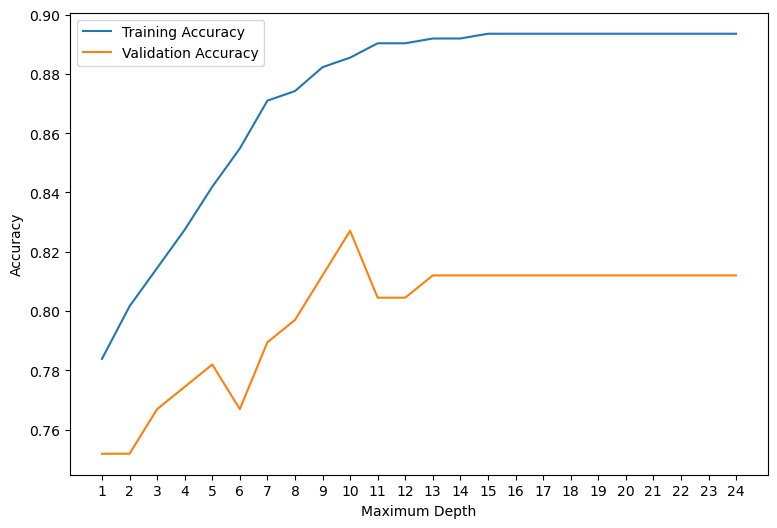

In [15]:
tr_acc = []
va_acc = []

depth_list = range(1,25)

for d in depth_list:
    temp_mod = DecisionTreeClassifier(max_depth=d, random_state=1)
    temp_mod.fit(X_train, y_train)
    tr_acc.append(temp_mod.score(X_train, y_train))
    va_acc.append(temp_mod.score(X_valid, y_valid))

plt.figure(figsize=([9, 6]))
plt.plot(depth_list, tr_acc, label='Training Accuracy')
plt.plot(depth_list, va_acc, label='Validation Accuracy')
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.xticks(depth_list)
plt.legend()
plt.show()

It appears that we get the best performance on the validation set when `max_depth=10`. We confirm this below.

In [16]:
ix_best = np.argmax(va_acc)
best_md = depth_list[ix_best]
print('Optimal Value of max_depth:', best_md)

Optimal Value of max_depth: 10


We will now create and score our decision tree model. 

In [17]:
tree_model = DecisionTreeClassifier(max_depth = best_md, random_state=1)
tree_model.fit(X_train, y_train)

print('Training Accuracy:  ', round(tree_model.score(X_train, y_train),4))
print('Validation Accuracy:', round(tree_model.score(X_valid, y_valid),4))

Training Accuracy:   0.8855
Validation Accuracy: 0.8271


## Create Random Forest Model

We will now create a random forest model consisting of 500 trees, each with a `max_depth` of 32. 

In [19]:
forest_mod = RandomForestClassifier(n_estimators=500, max_leaf_nodes=32, random_state=1)

forest_mod.fit(X_train, y_train)

print('Training Accuracy:  ', round(forest_mod.score(X_train, y_train),4))
print('Validation Accuracy:', round(forest_mod.score(X_valid, y_valid),4))

Training Accuracy:   0.879
Validation Accuracy: 0.8346


## Scoring Final Model

The random forest model had the highest validation accuracy of any of our models, so we will select it to be our final model. We will now calculate this model's accuracy on the test set. 

In [20]:
print('Test Set Accuracy:  ', round(forest_mod.score(X_test, y_test),4))

Test Set Accuracy:   0.791


In the cell below, we display the confusion matrix for our test set. 

In [21]:
test_pred = forest_mod.predict(X_test)

cm = confusion_matrix(y_test, test_pred)

cm_df = pd.DataFrame(cm)
cm_df

,0,1
0,70,12
1,16,36


We finish this example by displaying the classification report for the test set. 

In [22]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83        82
           1       0.75      0.69      0.72        52

    accuracy                           0.79       134
   macro avg       0.78      0.77      0.78       134
weighted avg       0.79      0.79      0.79       134

